# DSAC-FA-MVP-Visualization

In [3]:
%run DSAC-FA-MVP-StatisticalAnalysis.ipynb

In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Symbols,TSLA,F
Date,,
2020-12-31,NaN,NaN
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
...,...,...
2022-02-15,984.737397,18.913949
2022-02-16,986.227397,18.957640
2022-02-17,987.077297,18.992871


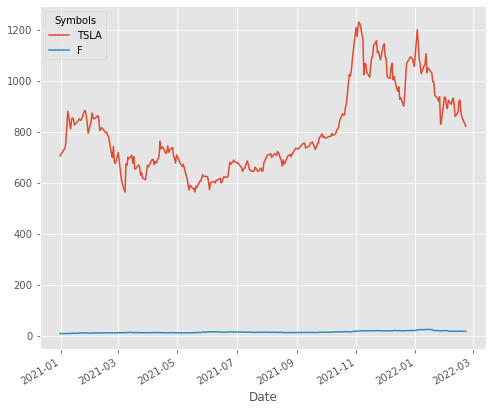

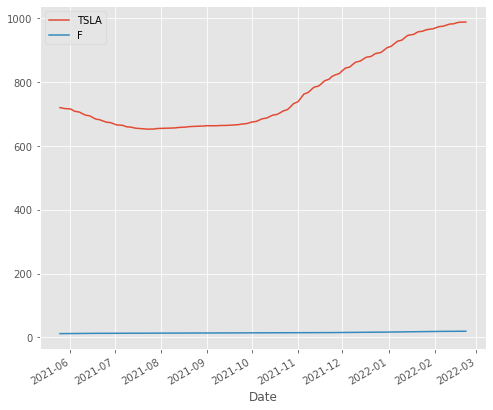

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

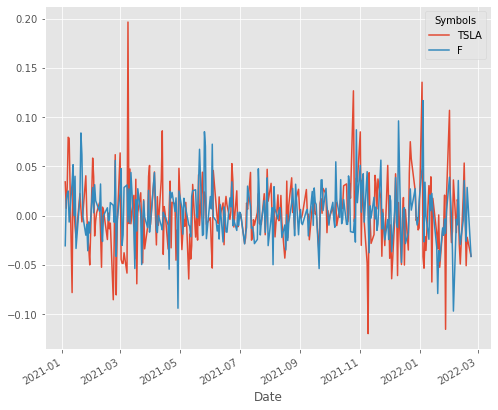

In [6]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [7]:
dfcomp = web.DataReader(['TSLA','F'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,TSLA,F
Date,,
2020-12-31,705.669983,8.701225
2021-01-04,729.770020,8.433952
2021-01-05,735.109985,8.562639
2021-01-06,755.979980,8.750721
2021-01-07,816.039978,8.968499
...,...,...
2022-02-15,922.429993,18.080000
2022-02-16,923.390015,18.010000
2022-02-17,876.349976,17.540001


In [8]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,TSLA,F
Symbols,,
TSLA,1.000000,0.213058
F,0.213058,1.000000


Text(0, 0.5, 'Returns TSLA')

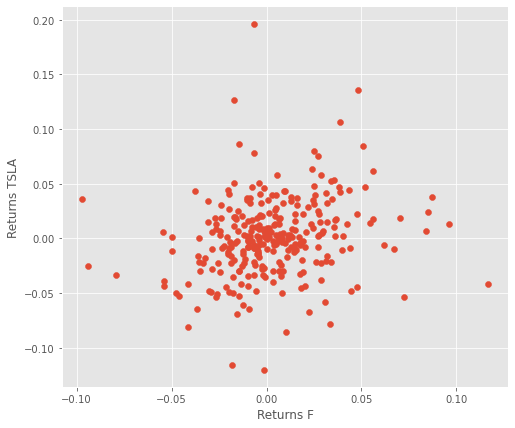

In [9]:
plt.scatter(retscomp.F, retscomp.TSLA)
plt.xlabel('Returns F')
plt.ylabel('Returns TSLA')

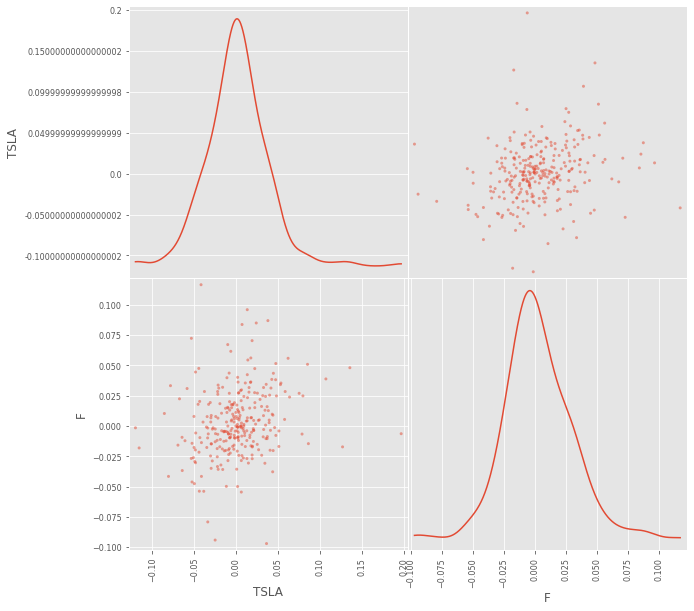

In [10]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

([<matplotlib.axis.YTick at 0x197f14b2ac0>,
 [Text(0, 0, 'TSLA'), Text(0, 0, 'F')])

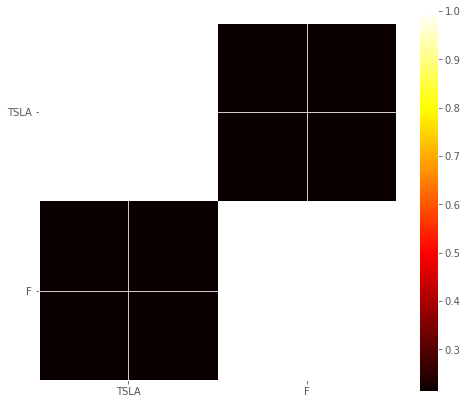

In [13]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

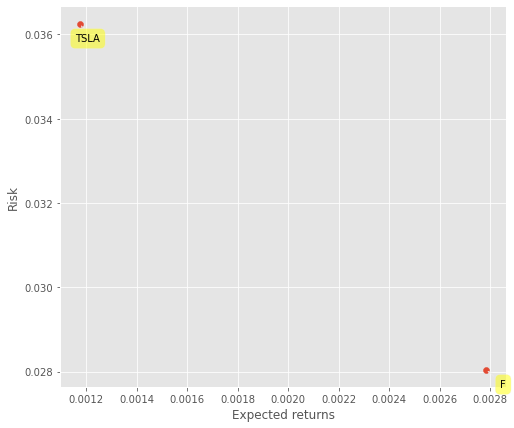

In [12]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))